In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('features_56x56.csv')

In [8]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f3127,f3128,f3129,f3130,f3131,f3132,f3133,f3134,f3135,label
0,0.525490,0.494118,0.509804,0.501961,0.498039,0.529412,0.482353,0.478431,0.450980,0.447059,...,0.560784,0.568627,0.556863,0.564706,0.560784,0.568627,0.556863,0.564706,0.560784,0
1,0.568627,0.568627,0.568627,0.568627,0.564706,0.560784,0.556863,0.552941,0.545098,0.537255,...,0.474510,0.482353,0.490196,0.494118,0.498039,0.501961,0.454902,0.501961,0.454902,0
2,0.560784,0.564706,0.556863,0.568627,0.560784,0.564706,0.556863,0.568627,0.560784,0.564706,...,0.450980,0.478431,0.482353,0.529412,0.498039,0.501961,0.509804,0.494118,0.525490,0
3,0.454902,0.501961,0.454902,0.501961,0.498039,0.494118,0.490196,0.482353,0.474510,0.466667,...,0.545098,0.552941,0.556863,0.560784,0.564706,0.568627,0.568627,0.568627,0.568627,0
4,0.454902,0.454902,0.454902,0.454902,0.454902,0.454902,0.549020,0.537255,0.552941,0.552941,...,0.564706,0.560784,0.564706,0.560784,0.568627,0.560784,0.564706,0.556863,0.568627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.470588,0.529412,0.470588,0.525490,0.521569,0.517647,0.509804,0.501961,0.494118,0.486275,...,0.572549,0.580392,0.588235,0.592157,0.596078,0.600000,0.600000,0.600000,0.600000,1
316,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.572549,0.564706,0.572549,0.576471,...,0.600000,0.592157,0.596078,0.588235,0.600000,0.592157,0.592157,0.588235,0.600000,1
317,0.588235,0.588235,0.588235,0.588235,0.584314,0.580392,0.572549,0.564706,0.560784,0.545098,...,0.521569,0.529412,0.533333,0.541176,0.545098,0.462745,0.549020,0.545098,0.552941,1
318,0.600000,0.588235,0.592157,0.592157,0.600000,0.588235,0.596078,0.592157,0.600000,0.588235,...,0.572549,0.564706,0.572549,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,1


In [10]:
X = df.drop(columns=['label'])
Y = df['label']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [16]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(1, 100):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_scaled)
    X_test_trf = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(
        n_neighbors=5,       # number of neighbors to use
        weights='distance',  # weight points by the inverse of their distance
        metric='minkowski',  # distance metric
        p=2                  # power parameter for Minkowski (2 = Euclidean)
    )

    knn.fit(X_train_trf, y_train)

    y_train_pred = knn.predict(X_train_trf)
    y_test_pred = knn.predict(X_test_trf)
    acc1 = accuracy_score(y_test, y_test_pred)
    acc2 = accuracy_score(y_train, y_train_pred)

    print(f"Components: {i}, Train Accuracy: {acc2:.4f} , Test Accuracy: {acc1:.4f}")

Components: 1, Train Accuracy: 1.0000 , Test Accuracy: 0.4531
Components: 2, Train Accuracy: 1.0000 , Test Accuracy: 0.5000
Components: 3, Train Accuracy: 1.0000 , Test Accuracy: 0.4531
Components: 4, Train Accuracy: 1.0000 , Test Accuracy: 0.7344
Components: 5, Train Accuracy: 1.0000 , Test Accuracy: 0.7031
Components: 6, Train Accuracy: 1.0000 , Test Accuracy: 0.7031
Components: 7, Train Accuracy: 1.0000 , Test Accuracy: 0.7188
Components: 8, Train Accuracy: 1.0000 , Test Accuracy: 0.6250
Components: 9, Train Accuracy: 1.0000 , Test Accuracy: 0.5781
Components: 10, Train Accuracy: 1.0000 , Test Accuracy: 0.5781
Components: 11, Train Accuracy: 1.0000 , Test Accuracy: 0.5781
Components: 12, Train Accuracy: 1.0000 , Test Accuracy: 0.5781
Components: 13, Train Accuracy: 1.0000 , Test Accuracy: 0.5938
Components: 14, Train Accuracy: 1.0000 , Test Accuracy: 0.6094
Components: 15, Train Accuracy: 1.0000 , Test Accuracy: 0.6250
Components: 16, Train Accuracy: 1.0000 , Test Accuracy: 0.6250
C

KeyboardInterrupt: 

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Loop over PCA components
for i in range(1, 100):
    # Create pipeline with PCA and KNN
    pipe = Pipeline([
        ('pca', PCA(n_components=i)),
        ('knn', KNeighborsClassifier(metric='minkowski'))
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    print(f"Components: {i}, Best Params: {grid.best_params_}, "
          f"Train Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")

Components: 1, Best Params: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.8047, Test Accuracy: 0.5312
Components: 2, Best Params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.7734, Test Accuracy: 0.5469
Components: 3, Best Params: {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}, Train Accuracy: 0.7656, Test Accuracy: 0.5000
Components: 4, Best Params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.7305, Test Accuracy: 0.7188
Components: 5, Best Params: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'distance'}, Train Accuracy: 1.0000, Test Accuracy: 0.7031
Components: 6, Best Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.7578, Test Accuracy: 0.6719
Components: 7, Best Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.7812, Test Accuracy: 0.6406
Components: 8, Best Params

In [36]:
#Best Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.8867, Test Accuracy: 0.7656

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [20]:
len(np.cumsum(pca.explained_variance_ratio_))

256

In [22]:
pca.explained_variance_ratio_.shape

(256,)

In [24]:
X_train_trf.shape

(256, 256)

In [26]:
X_train_scaled.shape

(256, 3136)

In [28]:
"""Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under
the hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."""

"Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under\nthe hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.61948516, 0.7567022 , 0.88997782, 0.91483051, 0.93427991,
       0.95319568, 0.96517144, 0.97433699, 0.98231778, 0.9836708 ,
       0.98496596, 0.98566137, 0.98629   , 0.98689838, 0.98748449,
       0.98800008, 0.98845128, 0.98886431, 0.98924096, 0.98961283,
       0.98996681, 0.99030864, 0.99063082, 0.99093883, 0.99123348,
       0.99151474, 0.99179165, 0.99206201, 0.99229402, 0.99252246,
       0.99272543, 0.99291624, 0.99309264, 0.99326295, 0.99343123,
       0.99359005, 0.99374718, 0.99389516, 0.99403551, 0.99417491,
       0.99431063, 0.99444276, 0.99457032, 0.99469491, 0.9948159 ,
       0.9949314 , 0.99504395, 0.99514857, 0.99524901, 0.9953456 ,
       0.99544052, 0.99552793, 0.99561329, 0.99569681, 0.99577936,
       0.99585932, 0.9959379 , 0.99601489, 0.99608967, 0.99616346,
       0.99623527, 0.99630636, 0.99637661, 0.9964456 , 0.99651326,
       0.9965791 , 0.99664321, 0.99670685, 0.99676965, 0.99683162,
       0.99689269, 0.99695107, 0.99700892, 0.99706544, 0.99712

In [32]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1

22

In [34]:
#Moving forward with 9 components as it explains over 98% variance of the data

In [36]:
pca = PCA(n_components=9)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [38]:
X_train_trf.shape

(256, 9)

In [40]:
X_test_trf.shape

(64, 9)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the model
rf_clf = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=None,          # depth of each tree (None = expand until all leaves are pure)
    random_state=42          # for reproducibility
)

# Train the model
rf_clf.fit(X_train_trf, y_train)

# Predict on train and test data
y_train_pred = rf_clf.predict(X_train_trf)
y_test_pred = rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))  # Use y_test_pred here

Training Accuracy: 1.0
Testing Accuracy: 0.671875

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        40
           1       0.57      0.50      0.53        24

    accuracy                           0.67        64
   macro avg       0.65      0.64      0.64        64
weighted avg       0.66      0.67      0.67        64



In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.5], # Number of features to consider for the best split (fraction, 'sqrt', 'log2')
    'bootstrap': [True, False],             # Whether bootstrap samples are used when building trees
    'criterion': ['gini', 'entropy'],      # The function to measure the quality of a split
}

# Create the model
rf_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    n_jobs=-1,                      # Use all cores for faster processing
    verbose=2,                      # Show progress
    scoring='accuracy',
    error_score='raise' # Metric for optimization
)

# Fit GridSearchCV
grid_search.fit(X_train_trf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-validation Accuracy:", best_score)

# Use the best model for predictions
best_rf_clf = grid_search.best_estimator_

# Predict on train and test data
y_train_pred = best_rf_clf.predict(X_train_trf)
y_test_pred = best_rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spl

In [44]:
final_rf_clf = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Train the model on the full training set
final_rf_clf.fit(X_train_trf, y_train)

# Predict on train and test data
y_train_pred = final_rf_clf.predict(X_train_trf)
y_test_pred = final_rf_clf.predict(X_test_trf)

# Evaluate
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.99609375
Testing Accuracy: 0.78125

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.81      0.54      0.65        24

    accuracy                           0.78        64
   macro avg       0.79      0.73      0.75        64
weighted avg       0.79      0.78      0.77        64



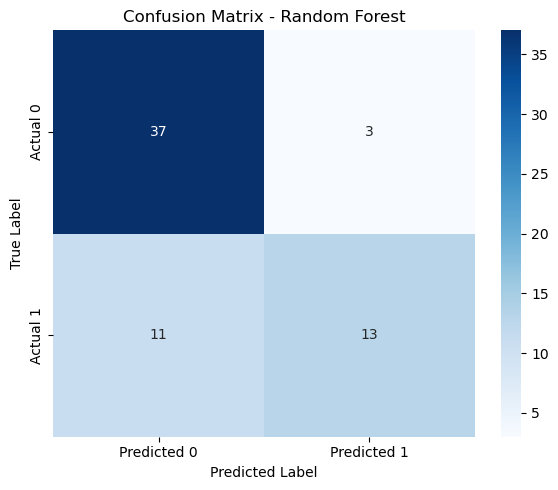

In [46]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()